In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy import stats
import matplotlib.font_manager as fm

In [4]:
nba_data = pd.read_csv('DB-NBA-cleaned.csv', sep=',', comment='#')

nba_df = pd.DataFrame(nba_data)

## Shot Distribution

In [83]:
nba_df.columns

Index(['SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER_NAME',
       'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID', 'HOME_TEAM',
       'AWAY_TEAM', 'SHOT_MADE', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE',
       'ZONE_NAME', 'ZONE_RANGE', 'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER',
       'TIME_LEFT_SECONDS'],
      dtype='object')

In [3]:
colores = {0: '#C8102E', 1: '#1D428A'}

In [79]:
nba_df.columns

Index(['SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER_NAME',
       'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID', 'HOME_TEAM',
       'AWAY_TEAM', 'SHOT_MADE', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE',
       'ZONE_NAME', 'ZONE_RANGE', 'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER',
       'TIME_LEFT_SECONDS'],
      dtype='object')

Hacemos una pequeña exploración de los datos tras el Data Cleaning. La siguiente gráfica muestra la distribución de los tiros más frecuente en el Dataset

In [50]:
nba_df['SEASON_2'].unique()

season_23_24 = nba_df[nba_df['SEASON_2'] == '2023-24']
season_22_23 = nba_df[nba_df['SEASON_2'] == '2022-23']
season_21_22 = nba_df[nba_df['SEASON_2'] == '2021-22']
season_20_21 = nba_df[nba_df['SEASON_2'] == '2020-21']
season_19_20 = nba_df[nba_df['SEASON_2'] == '2019-20']

<Figure size 1500x600 with 0 Axes>

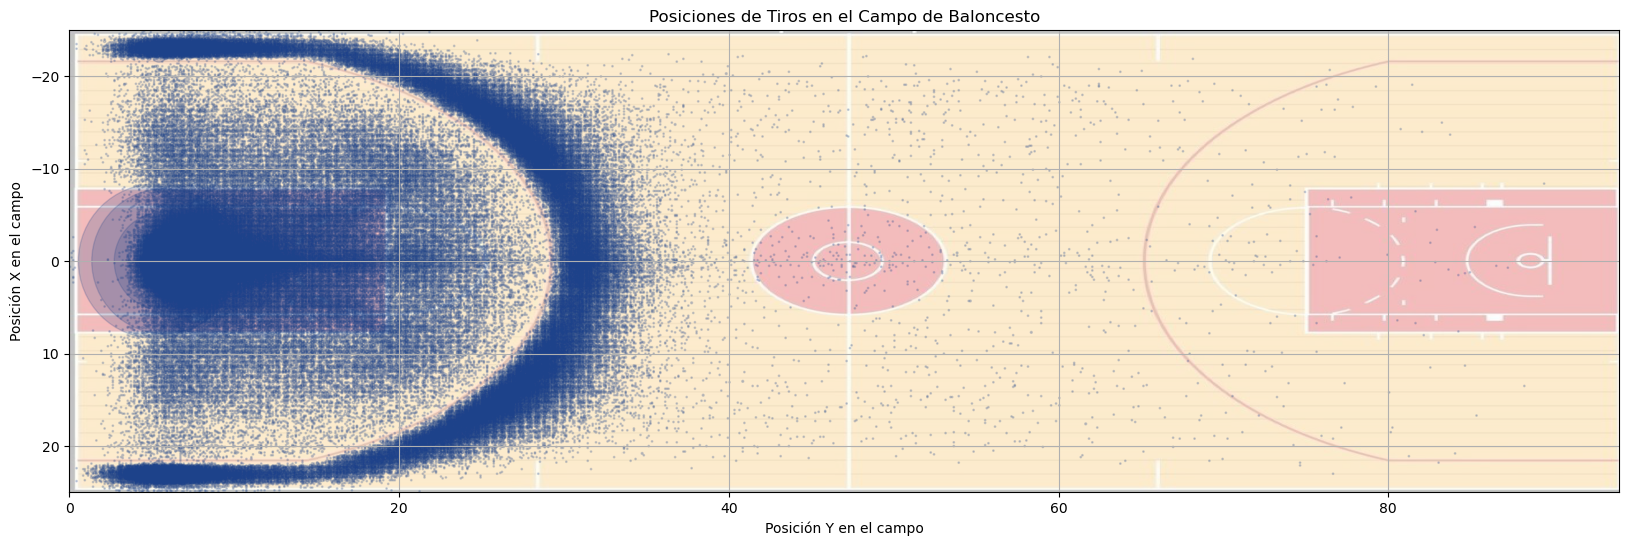

In [56]:
# Crear la figura
plt.figure(figsize=(15, 6))


# Graficar los puntos
grouped = nba_df.groupby(['LOC_X', 'LOC_Y']).size().reset_index(name='count')

plt.figure(figsize=(20, 6))
scatter = plt.scatter(
    grouped['LOC_Y'], 
    grouped['LOC_X'], 
    s=grouped['count'],      # tamaño de burbuja proporcional al número de tiros
    alpha=0.2, 
    color='#1D428A'
)



# Configurar los ejes
plt.xlabel('Posición Y en el campo')
plt.ylabel('Posición X en el campo')
plt.title('Posiciones de Tiros en el Campo de Baloncesto')

background = mpimg.imread('fondo-basket.jpg')  # <-- Tu imagen aquí

plt.imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.3)

plt.xlim(0, 94)  # Para que el ancho total sea 94 (de -47 a +47)
plt.ylim(25, -25)    # Para que el alto sea 50 (de 0 a 50)

# Mostrar una cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

We can see that most of the shots are thrown in two main hotspots:

Under the hoop.
Triple Line Zone.

With a most of the shots being centered, or in the case of the triple line zone, perpendicular to the hoop (dead zone)


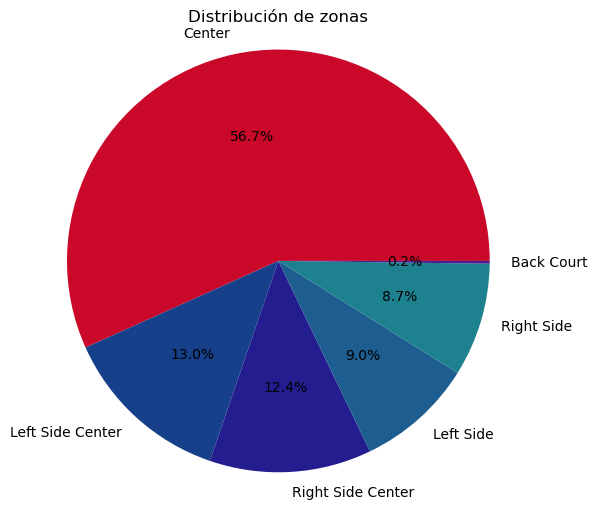

AttributeError: module 'matplotlib.pyplot' has no attribute 'transAxes'

In [ ]:
x = nba_df['ZONE_NAME'].value_counts()


label = nba_df['ZONE_NAME'].tolist()

plt.figure(figsize=(6,6))
plt.pie(x.values, labels=x.index,autopct='%1.1f%%', shadow = False, colors=('#C9082A','#17408B','#241D8F','#1D5D8F','#1D818F','#4A1D8F'))
plt.title('Distribución de zonas')
plt.axis('equal')
plt.show()



However, even if these zones are the prefered ones, there may exist some differents in between those hotspots.

Following, we will divide these distributions between those shots that made it, and those shots that missed the points

In [62]:
nba_acertados = nba_df[nba_df['SHOT_MADE'] == 1].copy()
nba_fallados = nba_df[nba_df['SHOT_MADE'] == 0].copy()

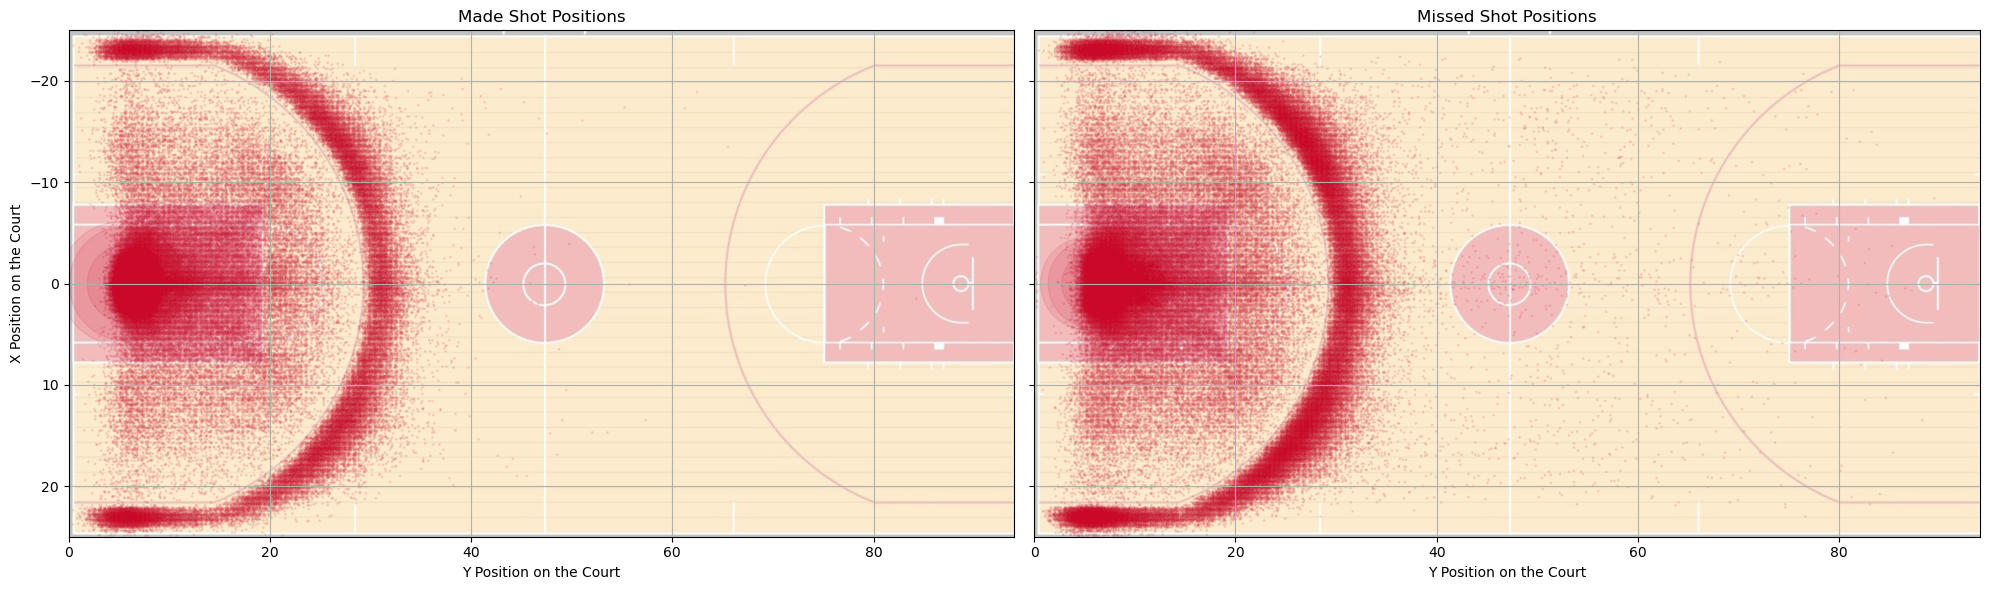

In [66]:
# Agrupar datos
grouped_made = nba_acertados.groupby(['LOC_X', 'LOC_Y']).size().reset_index(name='count')
grouped_missed = nba_fallados.groupby(['LOC_X', 'LOC_Y']).size().reset_index(name='count')

# Cargar imagen de fondo
background = mpimg.imread('fondo-basket.jpg')

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Primer subplot - tiros acertados
axes[0].scatter(
    grouped_made['LOC_Y'],
    grouped_made['LOC_X'],
    s=grouped_made['count'],
    alpha=0.1,
    color='#C9082A'
)
axes[0].imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.3)
axes[0].set_xlim(0, 94)
axes[0].set_ylim(25, -25)
axes[0].set_xlabel('Y Position on the Court')
axes[0].set_ylabel('X Position on the Court')
axes[0].set_title('Made Shot Positions')
axes[0].grid(True)

# Segundo subplot - tiros fallados
axes[1].scatter(
    grouped_missed['LOC_Y'],
    grouped_missed['LOC_X'],
    s=grouped_missed['count'],
    alpha=0.1,
    color='#C9082A'
)
axes[1].imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.3)
axes[1].set_xlim(0, 94)
axes[1].set_ylim(25, -25)
axes[1].set_xlabel('Y Position on the Court')
axes[1].set_ylabel('')
axes[1].set_title('Missed Shot Positions')
axes[1].grid(True)



# Ajustar espacio y mostrar
plt.tight_layout()
plt.show()

Even thought it may be minor, we can observe an slight difference between the effectivity of the shots.

We can see a noticeable less density in the shots that were thrown from the triple line zone, specially in those zones that are neither perpendicular nor centered to the hoop.

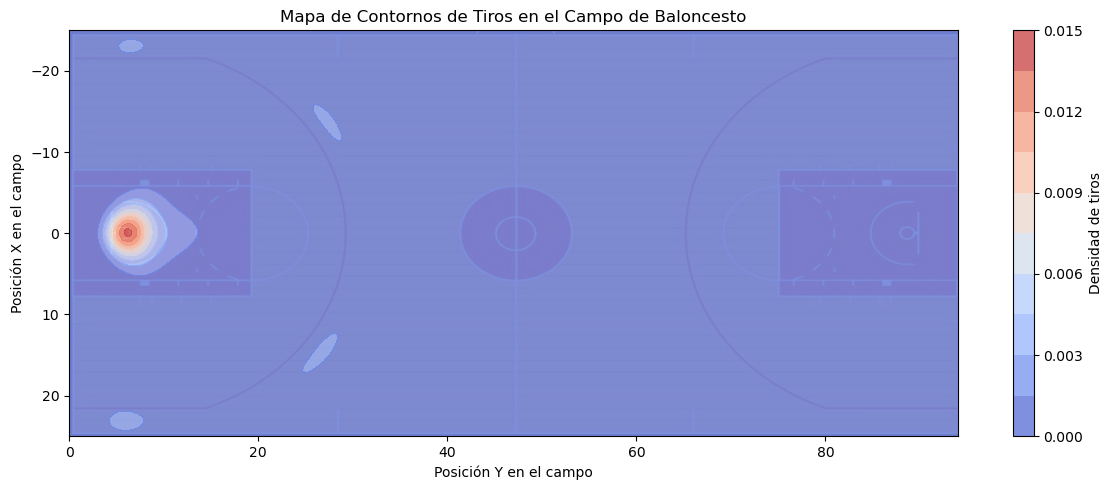

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import gaussian_kde

# Suponemos que tus datos están en nba_df con columnas LOC_X y LOC_Y
# nba_df = ...
x = season_23_24['LOC_Y']
y = season_23_24['LOC_X']

# Reducir la resolución de la malla (de 500j a 200j)
xi, yi = np.mgrid[0:94:200j, -25:25:200j]

# Usar array masking para filtrar posibles valores atípicos
mask = (x >= 0) & (x <= 94) & (y >= -25) & (y <= 25)
x_filtered = x[mask]
y_filtered = y[mask]

# Estimar densidad 2D con bw_method ajustado para mejor rendimiento
positions = np.vstack([xi.ravel(), yi.ravel()])
values = np.vstack([x_filtered, y_filtered])
kernel = gaussian_kde(values, bw_method='scott')  # 'scott' es generalmente más rápido que el valor predeterminado

# Calcular en un solo paso
zi = kernel(positions).reshape(xi.shape)

# Cargar la imagen del campo
background = mpimg.imread('fondo-basket.jpg')

# Crear el gráfico con tamaño optimizado
fig, ax = plt.subplots(figsize=(12, 5), dpi=100)  # Reducir tamaño y especificar DPI

# Fondo del campo
ax.imshow(background, extent=[0, 94, 25, -25], aspect='auto', alpha=0.3)

# Reducir el número de niveles en contourf
contour = ax.contourf(xi, yi, zi, levels=10, cmap='coolwarm', alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Posición Y en el campo')
ax.set_ylabel('Posición X en el campo')
ax.set_title('Mapa de Contornos de Tiros en el Campo de Baloncesto')

# Límites del campo
ax.set_xlim(0, 94)
ax.set_ylim(25, -25)

plt.colorbar(contour, ax=ax, label='Densidad de tiros')
plt.tight_layout()  # Optimiza el diseño
plt.show()

### Count of shots by zone

 On a more detailed approach, we can perceived these difference in a bar chart

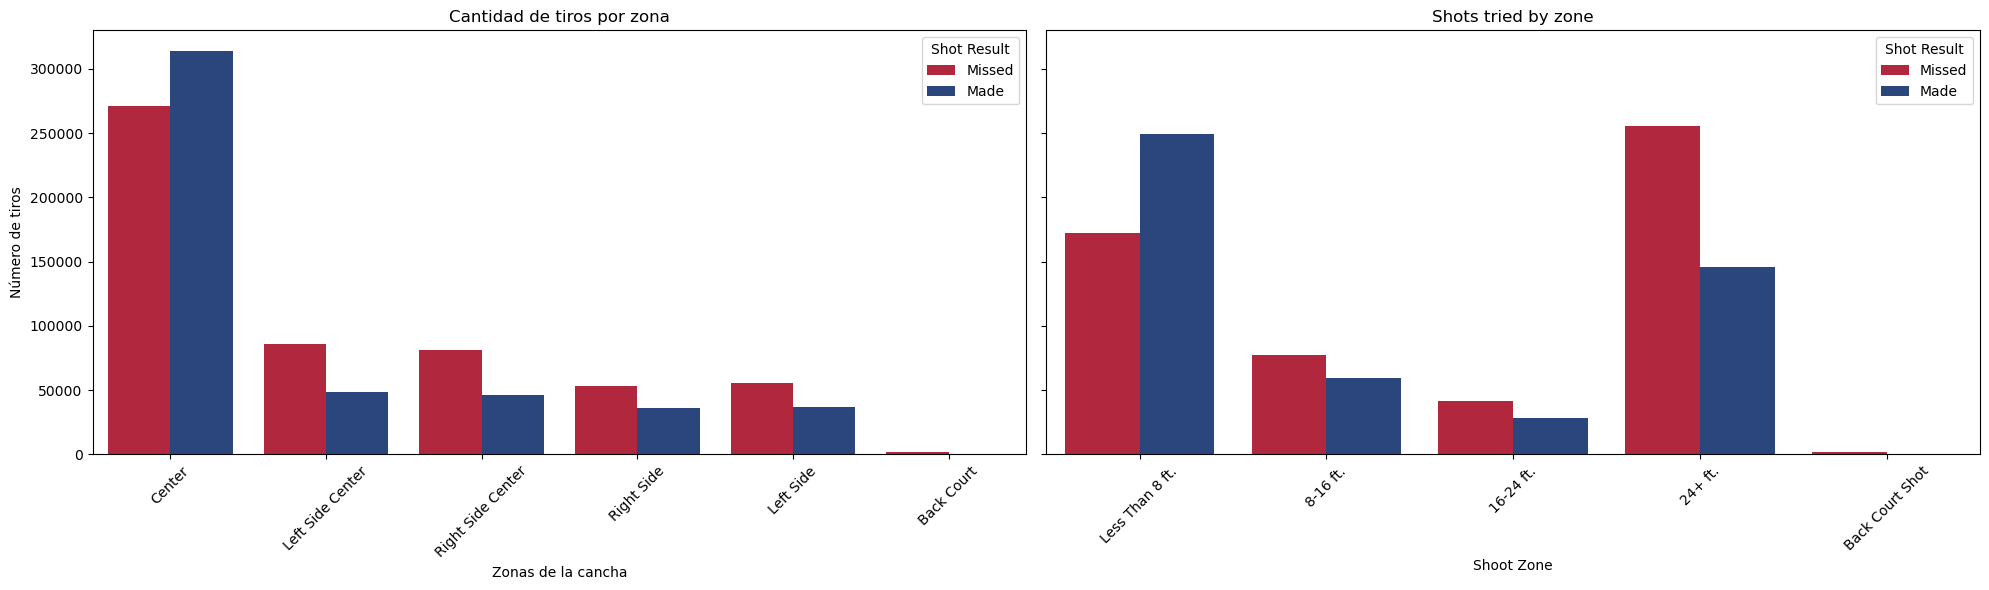

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
colores = {0: '#C8102E', 1: '#1D428A'}
orden_deseado = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'Back Court Shot']

sns.countplot(
    data=nba_df,
    x='ZONE_NAME',
    hue='SHOT_MADE',
    palette= colores,
    ax=ax[0]
)
ax[0].set_title('Cantidad de tiros por zona')
ax[0].set_xlabel('Zonas de la cancha')
ax[0].set_ylabel('Número de tiros')
ax[0].legend(title='Shot Result', labels=['Missed', 'Made'])
ax[0].tick_params(axis='x', rotation=45)

# -------- Gráfico 2: ZONE_RANGE --------
sns.countplot(
    data=nba_df,
    x='ZONE_RANGE',
    hue='SHOT_MADE',
    order=orden_deseado,
    palette=colores,
    ax=ax[1]
)
ax[1].set_title('Shots tried by zone')
ax[1].set_xlabel('Shoot Zone')
ax[1].set_ylabel('Amount of tries')
ax[1].legend(title='Shot Result', labels=['Missed', 'Made'])
ax[1].tick_params(axis='x', rotation=45)

# Ajustar espacios y mostrar
plt.tight_layout()
plt.show()

font_path = "/home/reboot-student/code/labs/Projects/DB-NBA/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)


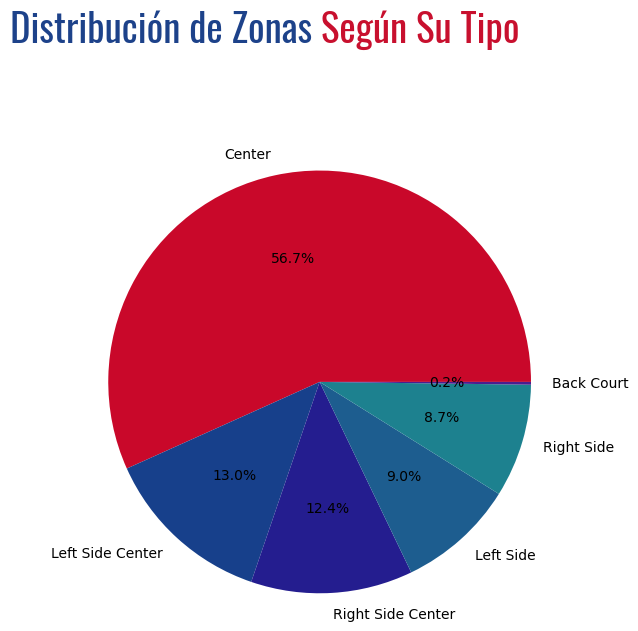

In [76]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

from matplotlib import font_manager as fm



# Crear una instancia de FontProperties
font_prop = FontProperties(family='sans-serif', style='normal', weight='bold', size=16)

# Ruta al archivo .ttf de la fuente
font_path = "/home/reboot-student/code/labs/Projects/DB-NBA/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)
# Calcular la distribución de zonas
x = nba_df['ZONE_NAME'].value_counts()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(6, 6))

# Crear el gráfico de pastel
ax.pie(
    x.values,
    labels=x.index,
    autopct='%1.1f%%',
    shadow=False,
    colors=('#C9082A', '#17408B', '#241D8F', '#1D5D8F', '#1D818F', '#4A1D8F')
)
ax.axis('equal')  # Asegura que el gráfico sea un círculo

# Añadir textos al gráfico
fig.text(
    0.5, 1.05, "Distribución de Zonas",
    fontproperties=font_prop,
    fontsize=28,
    color='#1D428A',
    ha='right',
    va='bottom'
)
fig.text(
    0.5, 1.05, " Según Su Tipo",
    fontproperties=font_prop,
    fontsize=28,
    color='#C8102E',
    ha='left',
    va='bottom'
)

# Mostrar el gráfico
plt.show()

In [112]:
print('As we can observe, we find some patterns that we have mention previously, getting the center the main focus. both at less than 8ft (hoop zone) and 24+ ft zone')
print("-"*100)
nba_df.groupby('ZONE_RANGE')[['ZONE_NAME','ZONE_RANGE']].value_counts()

As we can observe, we find some patterns that we have mention previously, getting the center the main focus. both at less than 8ft (hoop zone) and 24+ ft zone
----------------------------------------------------------------------------------------------------


ZONE_RANGE       ZONE_NAME        
16-24 ft.        Center                19310
                 Right Side Center     18783
                 Left Side Center      17568
                 Left Side              7442
                 Right Side             7054
24+ ft.          Left Side Center     116892
                 Right Side Center    108932
                 Center                77159
                 Left Side             51517
                 Right Side            46985
8-16 ft.         Center                67301
                 Right Side            35479
                 Left Side             33655
Back Court Shot  Back Court             2189
Less Than 8 ft.  Center               421417
Name: count, dtype: int64

Close to a half are made at 8 ft or less of the hoop, with the majority of it being centered. The other half is distributed between the other zones, being second most frequent the 24+ ft zone, with over a 100k shots

There is also a dramatic on the effectiveness of the shots as we predicted.

#### Efectividad de tiros por zona

In [124]:
nba_df.groupby('ZONE_RANGE')[['SHOT_MADE']].mean()*100


,SHOT_MADE
ZONE_RANGE,
16-24 ft.,40.637427
24+ ft.,36.263621
8-16 ft.,43.371569
Back Court Shot,2.878026
Less Than 8 ft.,59.124098


Close to the hoop shots, specially on the less than 8ft shows to be the most succesful range of all, with close to a 60% of sucess rate. 20% over the mid range (8-16ft) and the triple zone range (16-24ft and 24+ ft)

### High risk shots

As It may become natural, not all shots are throwed under the same cinrcumstances. The score, the quarter they are playing and the time left in that quarter are factores that can determinate high pressure situations. With this information, and knowing the advantage of close shots, we look for relationships between shot distance and time_left

Null Hypothesis: The less time there is left, doesnt mean the shot distance increases

Alt Hypothesis: The less time there is left, the shot distance tends to increase

In [8]:
nba_ct = pd.crosstab(nba_df['TIME_LEFT_SECONDS'],nba_df['SHOT_DISTANCE'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected= chi2_contingency(nba_ct)

if p < 0.05:
    print(p)
    print('Null hypothesis rejected. The less time in the score, the higher the shot distance')
elif p > 0.05:
    print(p)
    print('There is correlation')

0.0
Null hypothesis rejected. The less time in the score, the higher the shot distance


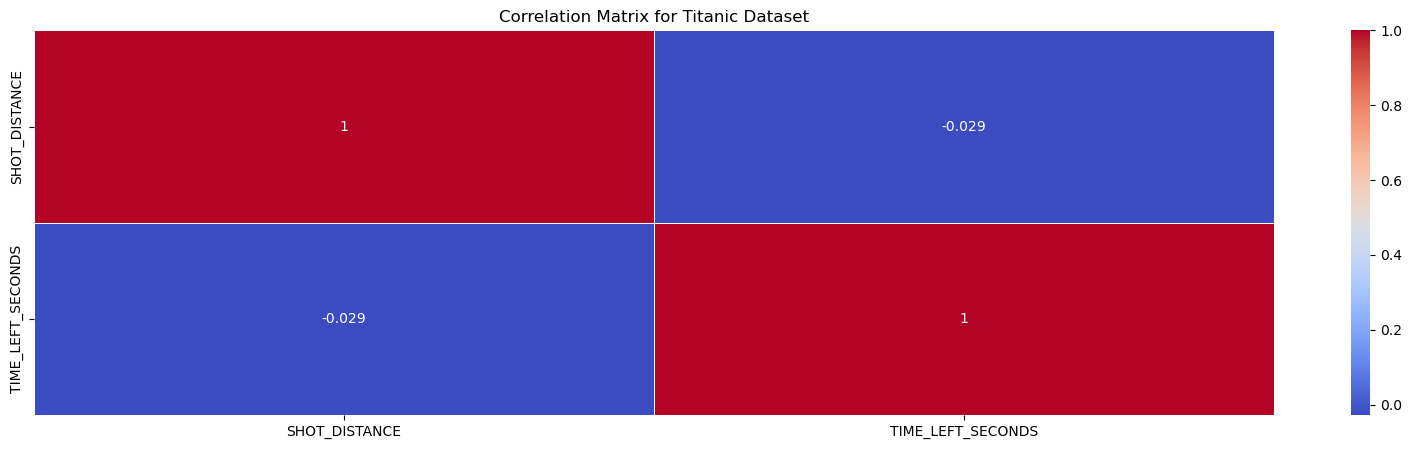

In [7]:
analysis = ['SHOT_DISTANCE','TIME_LEFT_SECONDS']
nba_analysis = nba_df[analysis]
nba_corr = nba_analysis.corr()

plt.figure(figsize=(20, 5))
sns.heatmap(nba_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Titanic Dataset')
plt.show()

A weak inverse correlation of 0.029 exist between shot distance and the time left of the quarter

<Axes: xlabel='TIME_LEFT_SECONDS', ylabel='SHOT_DISTANCE'>

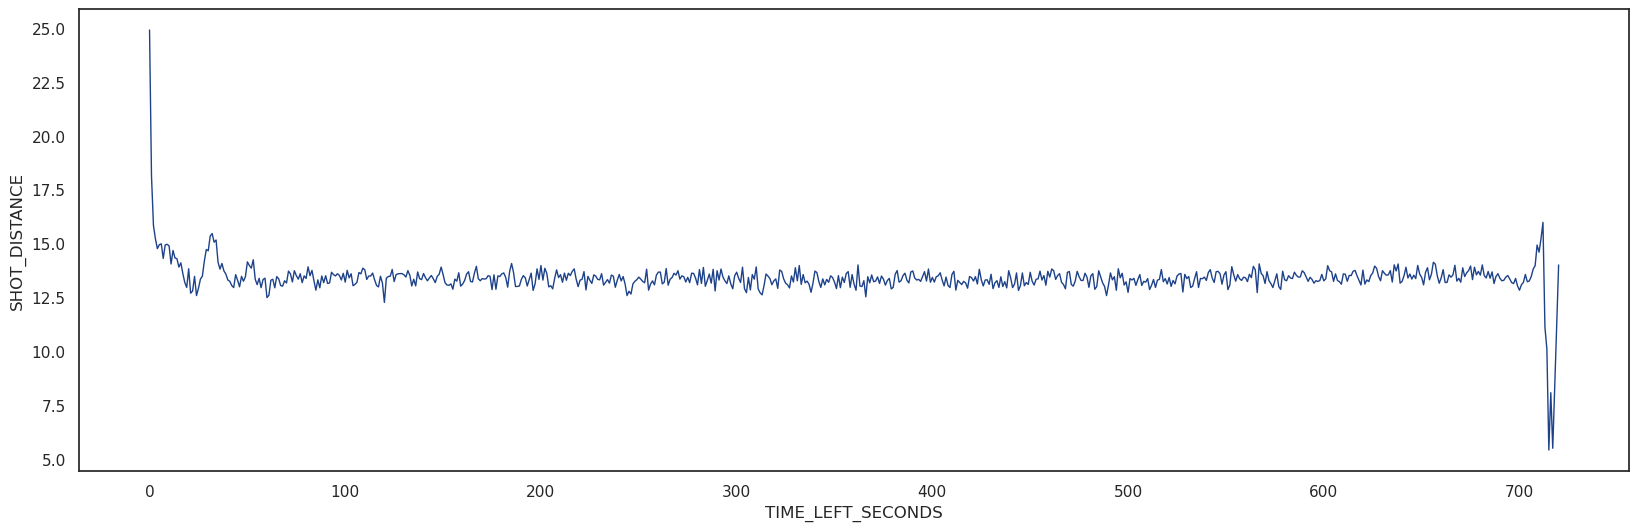

In [178]:
shots_by_distance = nba_df.groupby('TIME_LEFT_SECONDS')['SHOT_DISTANCE'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.lineplot(
    x='TIME_LEFT_SECONDS', 
    y='SHOT_DISTANCE', 
    data=shots_by_distance,
    linewidth=1,
    color='#1D428A'
)


On the line graph we can observe it even more clear it. Most shots are made at a relative equal distance during the course of the game, except the final few minutes of the quarter, where we can see riskier shots far away than the triple line zone.

#### Shots before the last minute

In [ ]:
last_minute = nba_df[nba_df['TIME_LEFT_SECONDS'] > 60]
last_minute['ZONE_RANGE'].value_counts(normalize=True).sort_index()*100


ZONE_RANGE
16-24 ft.           6.547471
24+ ft.            42.807854
8-16 ft.           11.082636
Back Court Shot     2.150913
Less Than 8 ft.    37.411127
Name: proportion, dtype: float64

#### Shots at the last minute

In [33]:
last_minute = nba_df[nba_df['TIME_LEFT_SECONDS'] < 60]
last_minute['ZONE_RANGE'].value_counts(normalize=True).sort_index()*100


ZONE_RANGE
16-24 ft.           6.547471
24+ ft.            42.807854
8-16 ft.           11.082636
Back Court Shot     2.150913
Less Than 8 ft.    37.411127
Name: proportion, dtype: float64

### Shot accuracy before and at the last minute

In [35]:
last_minute = nba_df[nba_df['TIME_LEFT_SECONDS'] > 60]
last_minute['SHOT_MADE'].value_counts(normalize=True).sort_index()*100

SHOT_MADE
False    52.729493
True     47.270507
Name: proportion, dtype: float64

In [36]:
last_minute = nba_df[nba_df['TIME_LEFT_SECONDS'] < 60]
last_minute['SHOT_MADE'].value_counts(normalize=True).sort_index()*100

SHOT_MADE
False    57.995872
True     42.004128
Name: proportion, dtype: float64

### Shot distance by quarter

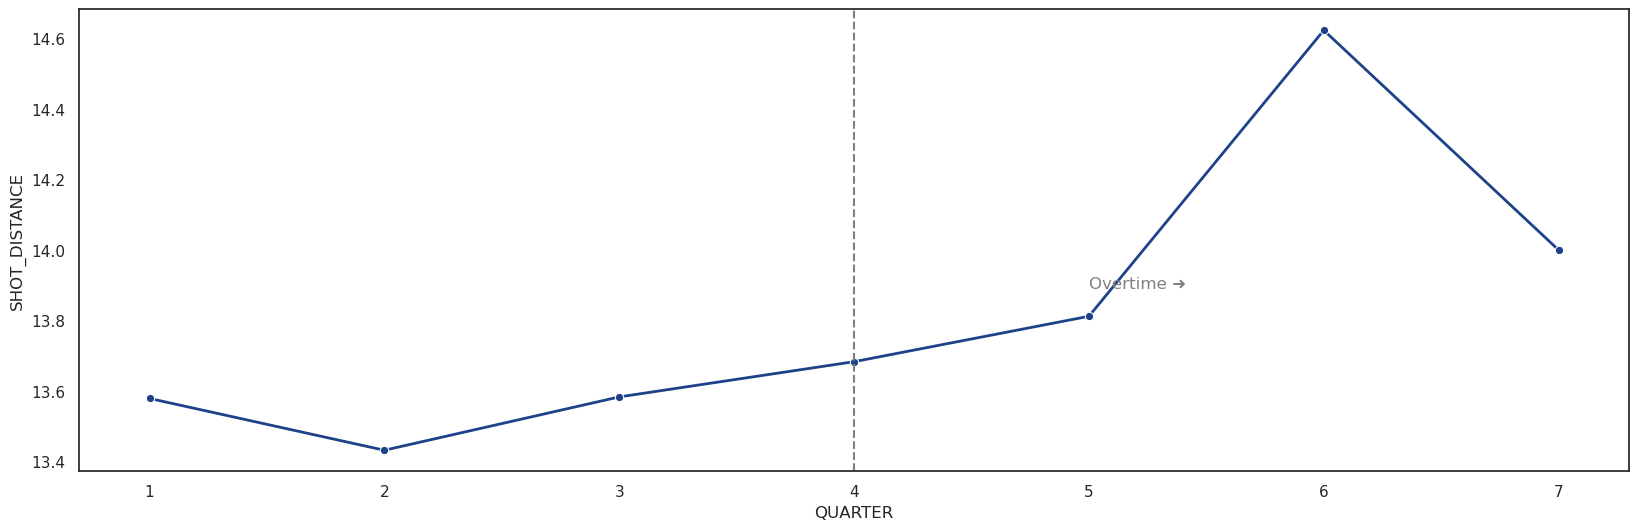

In [196]:
shots_by_quarter = nba_df.groupby('QUARTER')['SHOT_DISTANCE'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.lineplot(
    x='QUARTER', 
    y='SHOT_DISTANCE', 
    data=shots_by_quarter,
    marker='o',
    linewidth=2,
    color='#1D428A'
)


plt.axvline(x=4, color='gray', linestyle='--')
plt.text(5, shots_by_quarter['SHOT_DISTANCE'].max() * 0.95, 'Overtime ➜', color='gray', fontsize=12)

plt.show()

Following the trends observe on the previous point. The latter quarter seems to have riskier shoots. However, the main driver that makes those shoots ocurr are the overtime phases, making the teams to play riskier, not yet more succesfull, shots